In [1]:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset given below.


#Task:
#1.fitting it to the periodic function
#2.plot the fit


#Data
#Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [2]:
import numpy as np

max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Temperature')

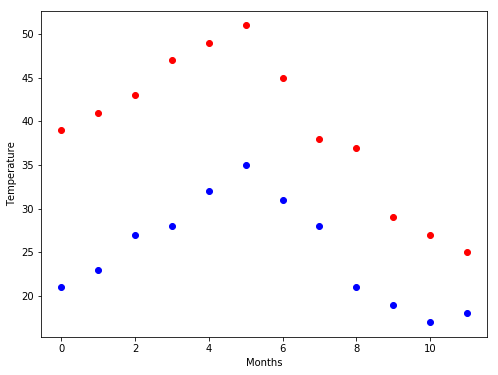

In [4]:
import matplotlib.pyplot as plt

months = np.arange(12)
plt.figure(figsize=(8,6))
plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'bo')
plt.xlabel('Months')
plt.ylabel('Temperature')

In [5]:
#Task 1: Fitting it to the periodic function

In [6]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_temp, [-40, 20, 0])

In [7]:
#Task 2: Plot the fit

Text(0, 0.5, 'Temperature ($^\\circ$C)')

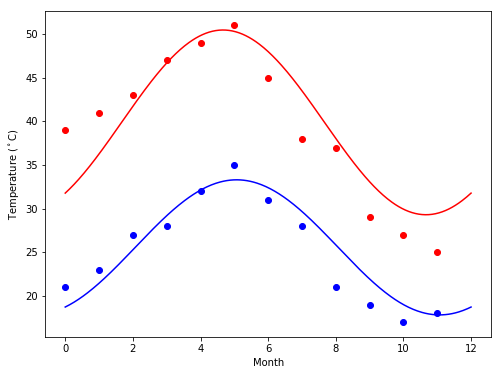

In [8]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

In [9]:
#Matplotlib:

#This assignment is for visualization using matplotlib:

#Data to use:
#url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#titanic = pd.read_csv(url)


#Charts to plot:
#1. Create a pie chart presenting the male/female proportion
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
#1. Create a pie chart presenting the male/female proportion

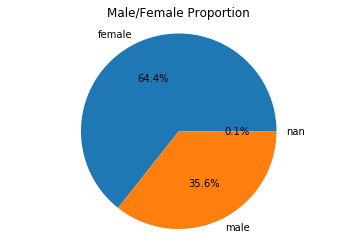

In [13]:
gender = titanic['sex'].astype('category')
gender = gender.cat.codes
plt.pie(gender.value_counts(), labels = titanic['sex'].unique(), autopct='%1.1f%%')
plt.title('Male/Female Proportion')
plt.axis('equal')
plt.show()

In [14]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

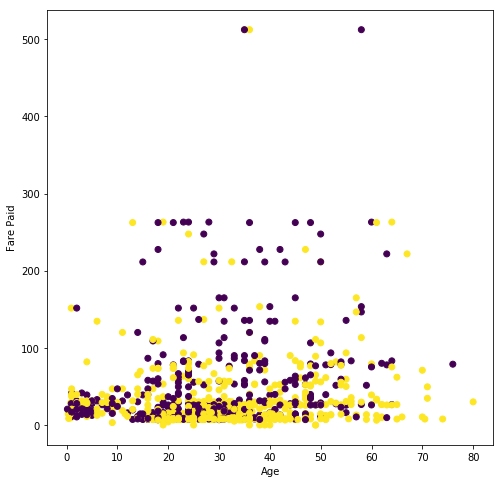

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(titanic['age'], titanic['fare'], c = gender)
plt.xlabel("Age")
plt.ylabel("Fare Paid")
plt.show()